<h1>Plot and Linear Regression Guide</h1>
<p><b>For SMASH CS Fundamentals II: Data Analysis</b> 
<br>This guide teaches you how you create basic plots and linear regression models with <b>matplotlib</b> and <b>numpy</b>.

matplotlib.pyplot API: 
<br><a href="https://matplotlib.org/api/pyplot_api.html">https://matplotlib.org/api/pyplot_api.html</a>

<h2>Import libraries</h2>
<p>For this we will use a new library called <b>numpy</b>.
<br>You'll be learning more about numpy when you start building linear regression models.
<br>I'm also importing <b>randint</b> and from random for later.</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

<h2>Create your data</h2>
<p>The overall purpose of a plot is to show the relationship between two or more variables.
<br>Here is some data from: <a href="https://www.mathsisfun.com/data/scatter-xy-plots.html">https://www.mathsisfun.com/data/scatter-xy-plots.html</a></p>

In [2]:
temps = (14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2) # in degrees Celsius
sales = (215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408) # dollars

# For the line plot, I'll need to sort the x-axis, otherwise I'll wind up with somethign funky.
# Don't worry about how this works. Just use it if you ever need to sort your data for line plots.
temps, sales = zip(*sorted(zip(temps, sales)))

<h2>Calculate the Pearson correlation coefficient (r)</h2>
<p>It's usually a good to include this in our plots.
<br>It's a quick way to see the relationship between two variables in one number.
<br>In the statistics world this is also called the <i>Pearson product-moment coefficient</i>.
<br>It isn't sufficient, mind you. We still need to plot the data to get a better sense of it.
<br>But we'll just calculate this here so we can use it later.
<br>Here's a link that demonstrates how to calculate r by hand: 
<br>https://www.mathsisfun.com/data/correlation.html
<br>Ain't nobody got time for that, so let's ask numpy to compute the correlation coefficient for us.</p>

In [3]:
print(np.corrcoef(temps, sales))

[[ 1.          0.95750662]
 [ 0.95750662  1.        ]]


<p>You see numpy.corrcoef returns a list-like structure containing 4 elements.
<br>Two 1s (i.e., relationship of a variable with itself) and two values that actually represent the relationship between temps and sales.
<br>That's a very strong positive correlation, by the way.
<br>So let's set r to 0.96 and move on with our lives.
<br>You can do that with the following. It takes the value from row 0, column 1, and rounds it two decimal places.

In [4]:
r = round(np.corrcoef(temps, sales)[0][1], 2)

<h2>Setup your graphic</h2>
<p>This part is very similar to how you did your graphics in the last two guides.</p>

In [5]:
# Again, place this above all of your figures. 
# It just ensures gridlines appear behind everything else.
plt.rc("axes", axisbelow=True)

# Give this figure a unique number.
plt.figure(1)


# We won't worry about xticks and yticks. 
# Instead, let's make our axes look just like they have at:
# https://www.mathsisfun.com/data/scatter-xy-plots.html
plt.axis([10, 26, 0, 700])

# Create gridlines so it's easier to find the data.
plt.grid(True)

# What's the name of your graphic?
# I'm using \N{DEGREE SIGN} ensure the degree sign goes before F. 
# And of course, \n just puts everything after it on the next line. 
plt.title("Ice Cream Sales ($) by Temperature (\N{DEGREE SIGN}C)\nr = {}".format(r))

# Let's label the axes.
plt.xlabel("Temperature (\N{DEGREE SIGN}C)")
plt.ylabel("Sales ($)")

<h2>Draw a scatter plot</h2>
<p>A scatter plot is the simplest way to represent the relationship between the variables.
<br>You can customize the style of the markers for this.
<br>You can find a list of markers here:
<br><a href="http://matplotlib.org/api/markers_api.html#module-matplotlib.markers">http://matplotlib.org/api/markers_api.html#module-matplotlib.markers</a></p>

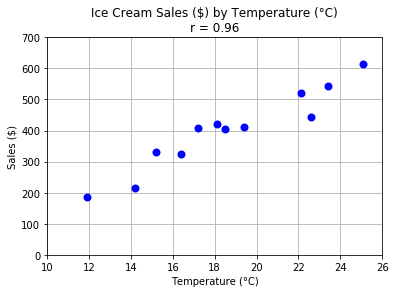

In [6]:
# Draw a scatter plot
plt.scatter(temps, sales, color="blue", marker=".", linewidth=5)
plt.show()

<h2>Draw a line plot</h2>
<p>Line plots can help us see change from one point to another
<br>Therefore, they usually make more sense when the x-axis is "time".
<br>But we'll draw a line plot here anyway.
<br>I'm also including the scatter plot just so we can see the points.</p>

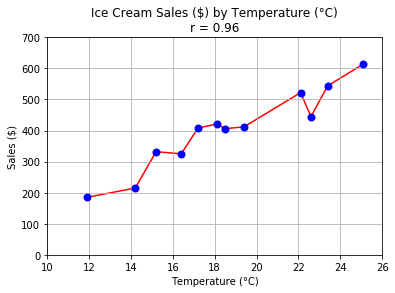

In [7]:
# Setup graphic
plt.figure(2)
plt.axis([10, 26, 0, 700])
plt.grid(True)
plt.title("Ice Cream Sales ($) by Temperature (\N{DEGREE SIGN}C)\nr = {}".format(r))
plt.xlabel("Temperature (\N{DEGREE SIGN}C)")
plt.ylabel("Sales ($)")

# Draw the line plot
plt.scatter(temps, sales, color="blue", marker=".", linewidth=5, zorder=1)
plt.plot(temps, sales, color="red", zorder=0)

# Show the figure
plt.show()

<h2>Draw multiple plots</h2>
<p>Here's an example that plots multiple data sets.
<br>We use color-coordination and a legend to help viewers.</p>

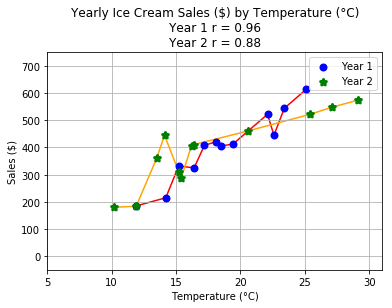

In [8]:
# Get some new data based on what we already have.
# This trick just adds small pseudo-random values (neg or pos) to the data we have.
# Doing so ensures the new data doesn't look too random.
temps_2 = [num + randint(-5, 5) for num in temps]
sales_2 = [num + randint(-50, 50) for num in sales]

# Sort the new data according to temps_2
temps_2, sales_2 = zip(*sorted(zip(temps_2, sales_2)))

# Get r for the new data
r_2 = round(np.corrcoef(temps_2, sales_2)[0][1], 2)

# Setup graphic. Changing my axes a bit to make sure the new data fits.
plt.figure(3)
plt.axis([5, 31, -50, 750])
plt.grid(True)
plt.title("Yearly Ice Cream Sales ($) by Temperature (\N{DEGREE SIGN}C)\nYear 1 r = {}\nYear 2 r = {}".format(r, r_2))
plt.xlabel("Temperature (\N{DEGREE SIGN}C)")
plt.ylabel("Sales ($)")

# Draw the first plot
plt.scatter(temps, sales, color="blue", marker=".", linewidth=5, zorder=1, label="Year 1")
plt.plot(temps, sales, color="red", zorder=0)

# Draw the second plot
plt.scatter(temps_2, sales_2, color="green", marker="*", linewidth=3, zorder=1, label="Year 2")
plt.plot(temps_2, sales_2, color="orange", zorder=0)

# Create the legend
plt.legend().draggable()

# Show the figure
plt.show()

<h2>Create a linear regression model</h2>
<p>Our original data looks like it follows a linear pattern.
<br>Let's use our algebra skills and numpy to come up with a simple model.</p>

In [9]:
# Create a linear model (y = ax + b) using np.polyfit()
# First argument passed represents our independent variable
# Second argument passed represents our dependent variable
# Third argument is the "degree" of the function, which will always be "1".
# More about function degrees here: http://www.tpub.com/math1/12a.htm
model = np.polyfit(temps, sales, deg=1)
print(model)

[  30.08786179 -159.47415234]


<p>The two values returned represent a and b, respectively. 
<br>So the complete model is:
<br><b>sales = 30.09 * temps - 159.47</b>
<br>But is this actually a good model for our data? 
<br>Let's find out by plotting it against the data itself.</p>

<h2>Plot the model ("line of best fit") onto the data</h2>
<p>This is an important step. It's not enough to just have the model. We have to test it.
<br>Plotting the model onto the data helps us judge how well it fits with our natural intuition.
<br>After all, the model is based on our assumption that the data follows a linear regression pattern.
<br>We won't really know for certain until we see it in action. <strong>Put it to the test!</strong></p>

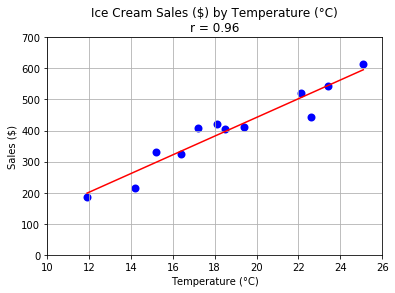

In [10]:
# Create a range of x values based on temps.
x_range = temps

# The function p sets up the y = ax + b equation for the next step
p = np.poly1d(model)    

# For every value in x_range, multiply by a and add b (i.e., just plug and chug!)
y_range = p(x_range)        

# Setup your graphic
plt.figure(4)
plt.axis([10, 26, 0, 700])
plt.grid(True)
plt.title("Ice Cream Sales ($) by Temperature (\N{DEGREE SIGN}C)\nr = {}".format(r))
plt.xlabel("Temperature (\N{DEGREE SIGN}C)")
plt.ylabel("Sales ($)")

# Draw the plot
plt.scatter(temps, sales, color="blue", marker=".", linewidth=5, zorder=0)

# Draw the regression line
plt.plot(x_range, y_range, color="red", zorder=1)

# Show the figure
plt.show()

<p>So what do you think? Is this a good model?</p>

<h2>That's all!</h2>
<p>There is more to plots and regression, but this is all you'll need for this course. 
<br>I suggest playing around with this more until you feel more comfortable. 
<br>And you can learn a lot by utilizing the excellent documentation I linked at the top.</p>